In [1]:
# P. Barry Seavey
# MSDS 498-57, Summer 2018
# Home Credit Group Project
# https://www.kaggle.com/c/home-credit-default-risk/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os
print(os.listdir('../Credit Risk'))

['.ipynb_checkpoints', '.Rhistory', 'application_test.csv', 'application_train.csv', 'application_train80.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'Data Files.zip', 'HCG - EDA1.ipynb', 'HCG - EDA_80.ipynb', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'notebook.tex', 'POS_CASH_balance.csv', 'prelim_EDA.docx', 'prelim_EDA.pdf', 'prelim_EDA_0718.pdf', 'prelim_EDA_0720.oxps', 'prelim_EDA_0720.pdf', 'prelim_EDA_0720.xps', 'previous_application.csv', 'Project Goals - SigmaSci Final v2 - p9.pdf', 'Project Goals - SigmaSci Final v2 - p9.svg', 'sample_submission.csv', 'SigmaSci_CreditRisk_RCode.R', 'submission_rf.csv', 'workspace1.RData']


In [4]:
# Start EDA - read train data

In [5]:
dftrain = pd.read_csv('application_train80.csv')

In [6]:
dftrain.shape

(246009, 123)

In [7]:
dftrain.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [8]:
dftrain.TARGET.isnull().sum()

0

In [9]:
dftrain.tail()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
246004,246005,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246005,246006,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
246006,246007,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246007,246008,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
246008,246009,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [10]:
dftrain = dftrain.drop(['Unnamed: 0'], axis=1)

In [11]:
dftrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [12]:
# load test data

In [13]:
#dftest = pd.read_csv('application_test.csv')

In [14]:
#dftest.shape

In [15]:
#dftest.head()

In [16]:
# find number of missing values

In [17]:
tot_miss = dftrain.isnull().sum().sort_values(ascending=False)
#pct_miss = (dftrain.isnull().sum() / dftrain.isnull().count() * 100).sort_values(ascending=False)
pct_miss = (dftrain.isnull().sum() / len(dftrain)*100).sort_values(ascending=False)

In [18]:
data_miss = pd.concat([tot_miss, pct_miss], axis=1, keys= ['Tot Missing', '% Missing'])

In [19]:
data_miss.head(20)

,Tot Missing,% Missing
COMMONAREA_MEDI,171907,69.878338
COMMONAREA_AVG,171907,69.878338
COMMONAREA_MODE,171907,69.878338
NONLIVINGAPARTMENTS_MODE,170768,69.415347
NONLIVINGAPARTMENTS_MEDI,170768,69.415347
NONLIVINGAPARTMENTS_AVG,170768,69.415347
FONDKAPREMONT_MODE,168253,68.393026
LIVINGAPARTMENTS_MEDI,168151,68.351564
LIVINGAPARTMENTS_MODE,168151,68.351564
LIVINGAPARTMENTS_AVG,168151,68.351564


In [20]:
data_miss.tail(10)

,Tot Missing,% Missing
FLAG_DOCUMENT_20,0,0.0
FLAG_DOCUMENT_21,0,0.0
ORGANIZATION_TYPE,0,0.0
LIVE_CITY_NOT_WORK_CITY,0,0.0
REG_CITY_NOT_WORK_CITY,0,0.0
REG_CITY_NOT_LIVE_CITY,0,0.0
LIVE_REGION_NOT_WORK_REGION,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
SK_ID_CURR,0,0.0


In [21]:
#

In [22]:
dftrain.TARGET.nunique()

2

In [23]:
for name in dftrain.columns:
    print(name, dftrain[name].nunique())

SK_ID_CURR 246009
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2195
AMT_CREDIT 5273
AMT_ANNUITY 13177
AMT_GOODS_PRICE 900
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17426
DAYS_EMPLOYED 12094
DAYS_REGISTRATION 15402
DAYS_ID_PUBLISH 6141
OWN_CAR_AGE 60
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 16
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 94575
EXT_SOURCE_2 108977
EXT_SOURCE_3 806
APARTMENTS_AVG 2248
BASEMENTAREA_AVG 3687
YEARS_BEGINEXPLUATATION_AVG 269
YEARS_BUILD_AVG 149
COMMONAREA_

In [24]:
dftrain.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [25]:
# will need to re-code XNA to something like U

In [26]:
dftrain.CODE_GENDER.isnull().sum()

0

In [27]:
dftrain.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [28]:
dftrain.NAME_CONTRACT_TYPE.isnull().sum()

0

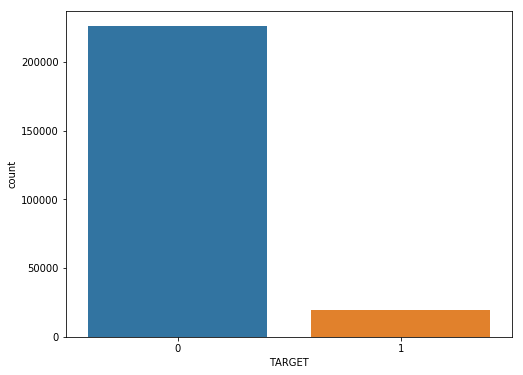

In [29]:
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,1,1)
sns.countplot(dftrain['TARGET']);

In [30]:
(dftrain.TARGET==1).sum()/dftrain.TARGET.count()

0.08073688360994923

In [31]:
# 8% of entries in train data are TARGET=1 - may need to stratify

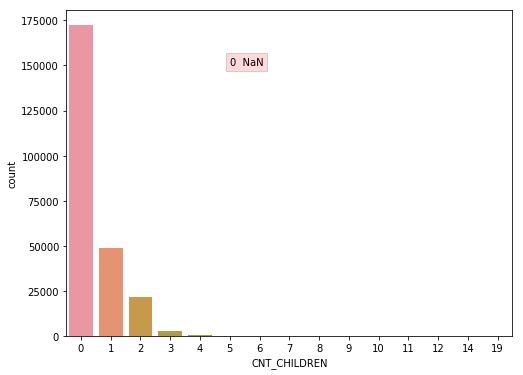

In [32]:
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,1,1)
sns.countplot(dftrain['CNT_CHILDREN'])
plt.text(5, 150000, '%d %s' %(dftrain['CNT_CHILDREN'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

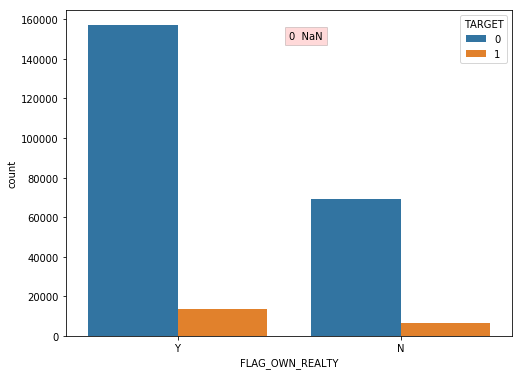

In [33]:
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,1,1)
sns.countplot(dftrain['FLAG_OWN_REALTY'], hue=dftrain['TARGET'])
plt.text(0.5, 150000, '%d %s' %(dftrain['FLAG_OWN_REALTY'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

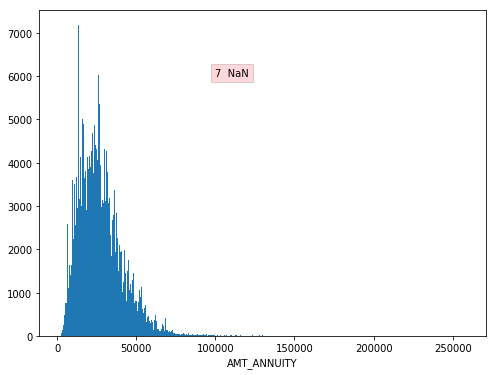

In [34]:
fig = plt.figure(figsize=(8,6))
plt.hist(dftrain['AMT_ANNUITY'].dropna(), bins='auto')
plt.text(100000,6000, '%d %s' %(dftrain['AMT_ANNUITY'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('AMT_ANNUITY')
plt.show()

In [35]:
dftrain.AMT_ANNUITY.describe()

count    246002.000000
mean      27096.783238
std       14462.967628
min        1615.500000
25%       16506.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

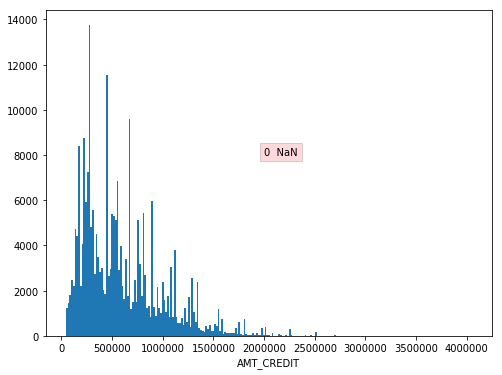

In [36]:
fig = plt.figure(figsize=(8,6))
plt.hist(dftrain['AMT_CREDIT'].dropna(), bins='auto')
plt.text(2000000, 8000, '%d %s' %(dftrain['AMT_CREDIT'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('AMT_CREDIT')
plt.show()

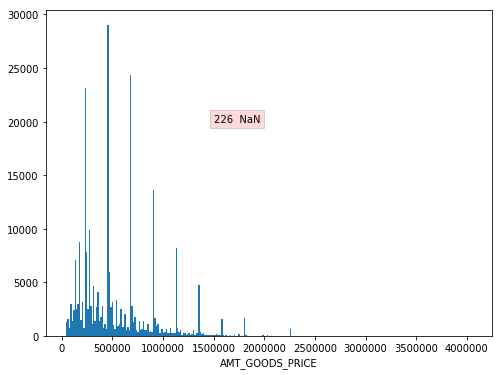

In [37]:
fig = plt.figure(figsize=(8,6))
plt.hist(dftrain['AMT_GOODS_PRICE'].dropna(), bins='auto')
plt.text(1500000,20000, '%d %s' %(dftrain['AMT_GOODS_PRICE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('AMT_GOODS_PRICE')
plt.show()

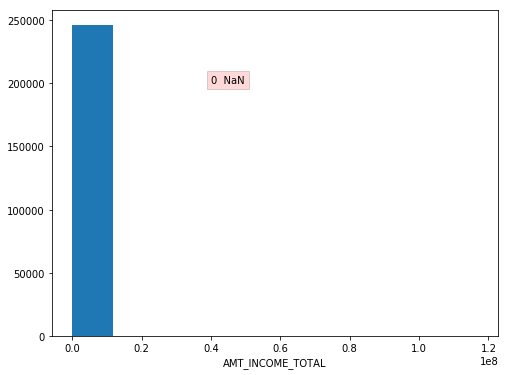

In [38]:
fig = plt.figure(figsize=(8,6))
plt.hist(dftrain['AMT_INCOME_TOTAL'].dropna())#, bins='auto')
plt.text(40000000,200000, '%d %s' %(dftrain['AMT_INCOME_TOTAL'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

In [39]:
dftrain.AMT_INCOME_TOTAL.describe()

count    2.460090e+05
mean     1.688135e+05
std      2.600104e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.449855e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

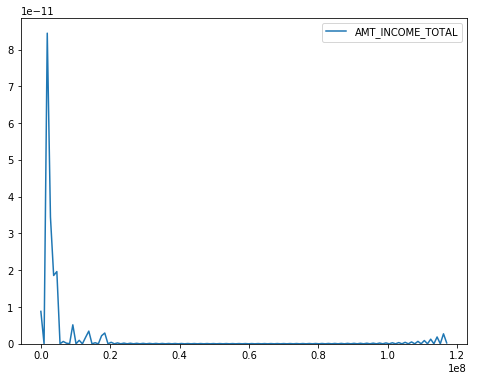

In [40]:
fig = plt.figure(figsize=(8,6))
sns.kdeplot(dftrain.AMT_INCOME_TOTAL);

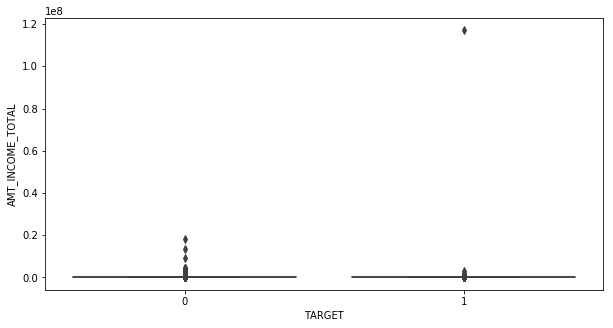

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x=dftrain['TARGET'], y=dftrain['AMT_INCOME_TOTAL']);

In [42]:
dftrain.AMT_INCOME_TOTAL.describe()

count    2.460090e+05
mean     1.688135e+05
std      2.600104e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.449855e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

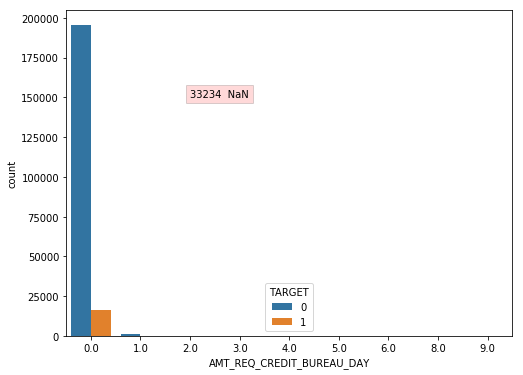

In [43]:
fig = plt.figure(figsize=(8,6))
sns.countplot(dftrain['AMT_REQ_CREDIT_BUREAU_DAY'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 150000, '%d %s' %(dftrain['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

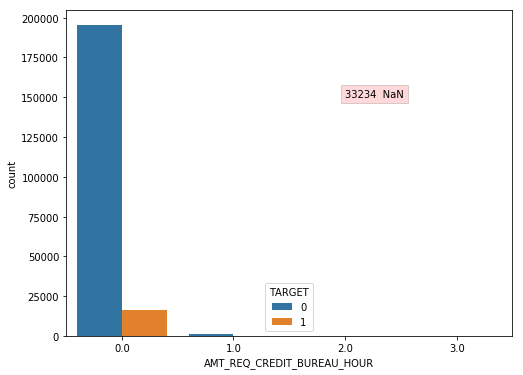

In [44]:
fig = plt.figure(figsize=(8,6))
sns.countplot(dftrain['AMT_REQ_CREDIT_BUREAU_HOUR'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 150000, '%d %s' %(dftrain['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

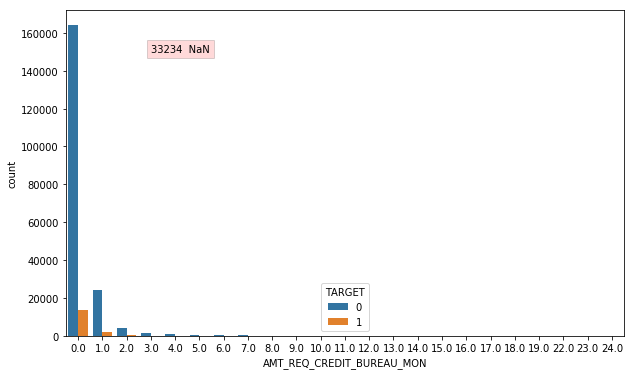

In [45]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['AMT_REQ_CREDIT_BUREAU_MON'].dropna(), hue=dftrain['TARGET'])
plt.text(3, 150000, '%d %s' %(dftrain['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

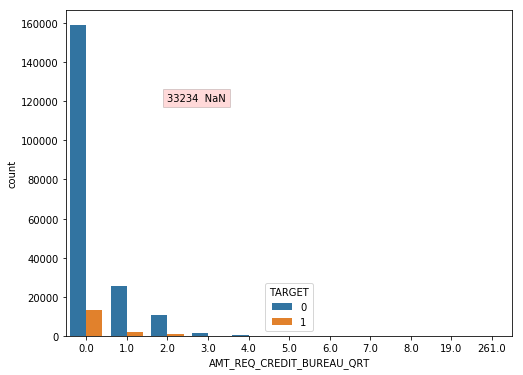

In [46]:
fig = plt.figure(figsize=(8,6))
sns.countplot(dftrain['AMT_REQ_CREDIT_BUREAU_QRT'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 120000, '%d %s' %(dftrain['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

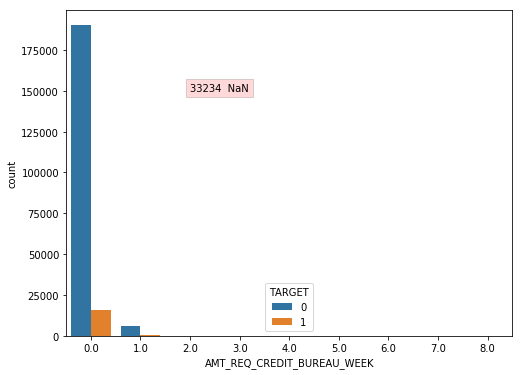

In [47]:
fig = plt.figure(figsize=(8,6))
sns.countplot(dftrain['AMT_REQ_CREDIT_BUREAU_WEEK'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 150000, '%d %s' %(dftrain['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

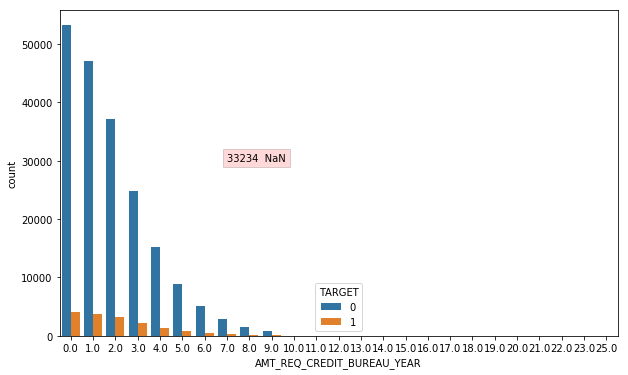

In [48]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna(), hue=dftrain['TARGET'])
plt.text(7, 30000, '%d %s' %(dftrain['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

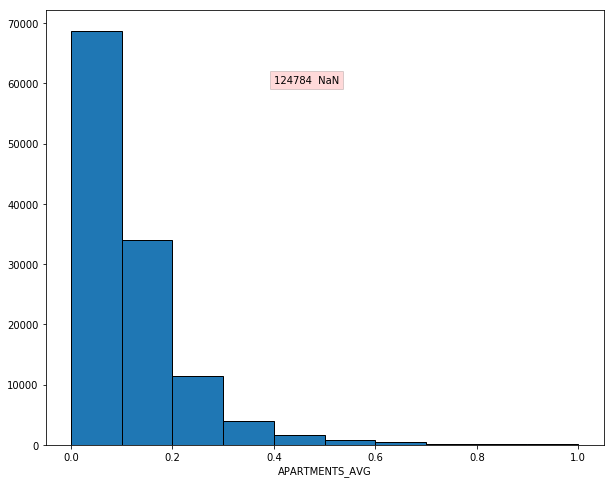

In [49]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['APARTMENTS_AVG'].dropna(), edgecolor='k')
plt.text(0.4,60000, '%d %s' %(dftrain['APARTMENTS_AVG'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('APARTMENTS_AVG')
plt.show()

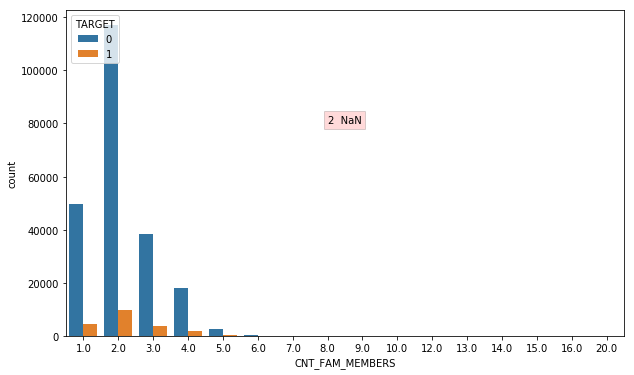

In [50]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['CNT_FAM_MEMBERS'].dropna(), hue=dftrain['TARGET'])
plt.text(7, 80000, '%d %s' %(dftrain['CNT_FAM_MEMBERS'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

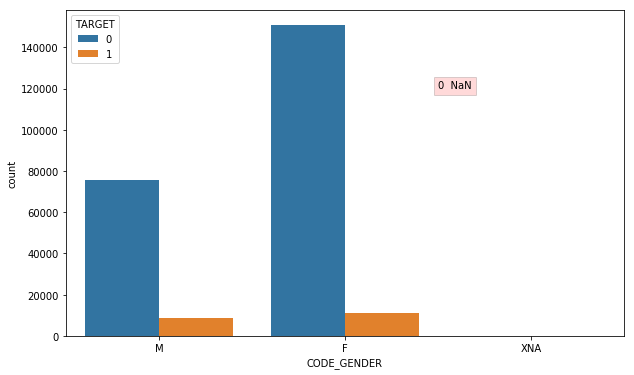

In [51]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['CODE_GENDER'].dropna(), hue=dftrain['TARGET'])
plt.text(1.5, 120000, '%d %s' %(dftrain['CODE_GENDER'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

In [52]:
dftrain.loc[dftrain['CODE_GENDER']=='XNA', 'CODE_GENDER'].agg(['count'])

count    2
Name: CODE_GENDER, dtype: int64

In [53]:
# re-code XNA to U, just for clarity

In [54]:
dftrain['CODE_GENDER'] = dftrain['CODE_GENDER'].replace('XNA', 'U')

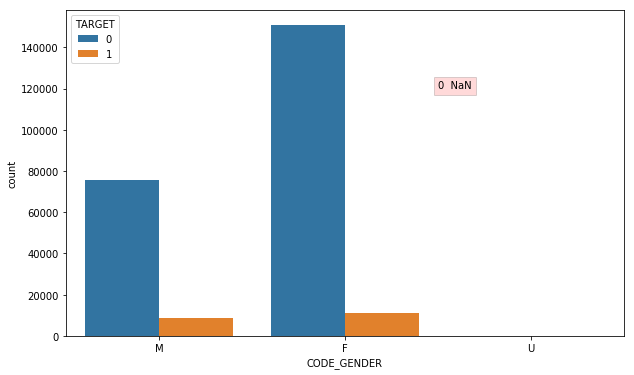

In [55]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['CODE_GENDER'].dropna(), hue=dftrain['TARGET'])
plt.text(1.5, 120000, '%d %s' %(dftrain['CODE_GENDER'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

In [56]:
# just from observation, looks like GENDER will be failry predictive - M look to be ~ twice as likely to default

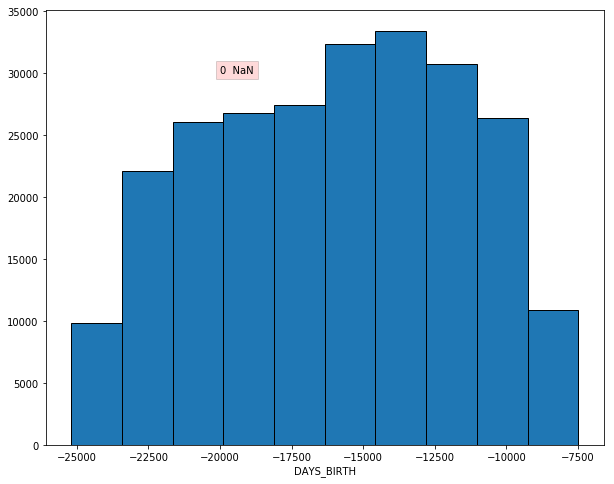

In [57]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DAYS_BIRTH'].dropna(), edgecolor='k')
plt.text(-20000,30000, '%d %s' %(dftrain['DAYS_BIRTH'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DAYS_BIRTH')
plt.show()

In [58]:
dftrain['BIRTH_NORM'] = abs(dftrain['DAYS_BIRTH']/365.)

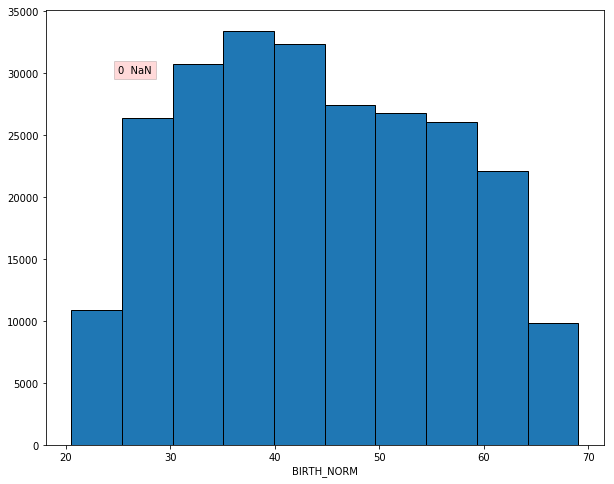

In [59]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['BIRTH_NORM'].dropna(), edgecolor='k')
plt.text(25,30000, '%d %s' %(dftrain['BIRTH_NORM'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('BIRTH_NORM')
plt.show()

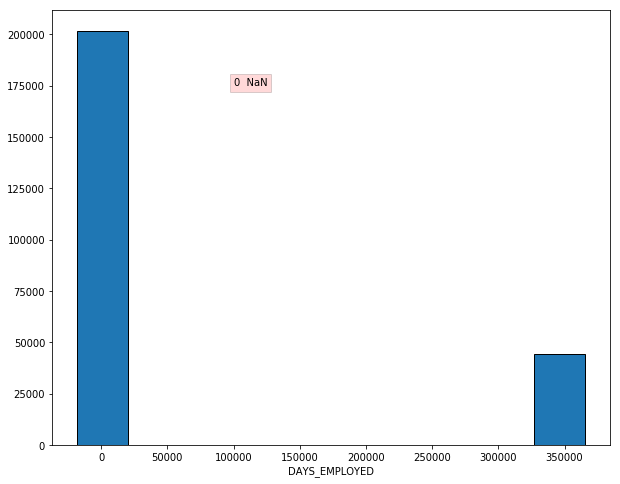

In [60]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DAYS_EMPLOYED'].dropna(), edgecolor='k')
plt.text(100000,175000, '%d %s' %(dftrain['DAYS_EMPLOYED'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DAYS_EMPLOYED')
plt.show()

In [61]:
dftrain.DAYS_EMPLOYED.describe()

count    246009.000000
mean      63656.382449
std      141147.410891
min      -17912.000000
25%       -2767.000000
50%       -1217.000000
75%        -291.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
# apparently 365243 is equivalent to 'infinity' per kaggle info
365243/365.25 # this is where it comes from - 999 input, speculated is by retirees (pensioners)

999.98083504449

In [63]:
dftrain['DAYS_EMPLOYED'] = dftrain['DAYS_EMPLOYED'].replace(365243, np.nan)

In [64]:
dftrain['YRS_EMPLOYED'] = abs(dftrain['DAYS_EMPLOYED']/365.)

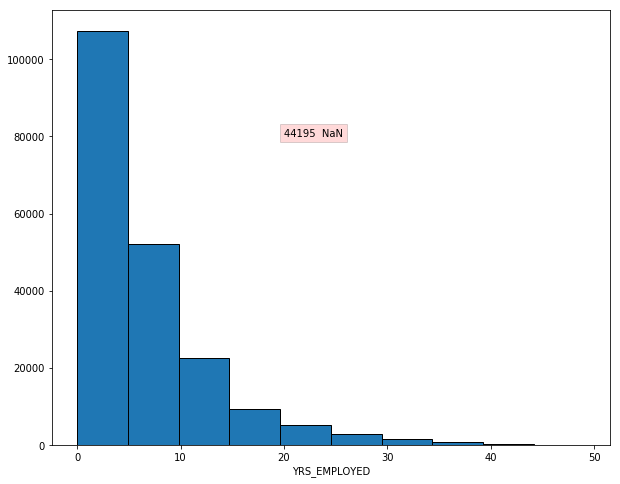

In [65]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['YRS_EMPLOYED'].dropna(), edgecolor='k')
plt.text(20,80000, '%d %s' %(dftrain['YRS_EMPLOYED'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('YRS_EMPLOYED')
plt.show()

In [66]:
dftrain.YRS_EMPLOYED.describe()

count    201814.000000
mean          6.541645
std           6.416041
min           0.000000
25%           2.104110
50%           4.523288
75%           8.720548
max          49.073973
Name: YRS_EMPLOYED, dtype: float64

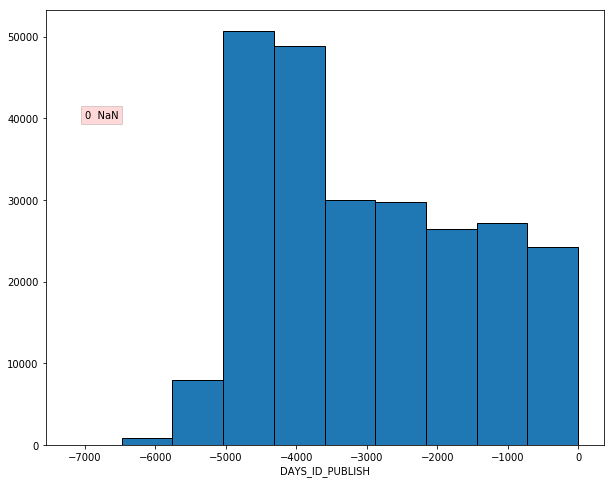

In [67]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DAYS_ID_PUBLISH'].dropna(), edgecolor='k')
plt.text(-7000, 40000, '%d %s' %(dftrain['DAYS_ID_PUBLISH'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DAYS_ID_PUBLISH')
plt.show()

In [68]:
dftrain['YRS_ID_PUBLISH'] = abs(dftrain['DAYS_ID_PUBLISH']/365.)

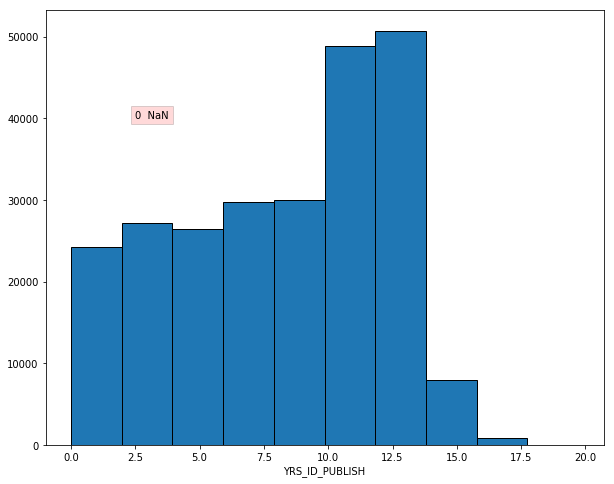

In [69]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['YRS_ID_PUBLISH'].dropna(), edgecolor='k')
plt.text(2.5, 40000, '%d %s' %(dftrain['DAYS_ID_PUBLISH'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('YRS_ID_PUBLISH')
plt.show()

In [70]:
dftrain.YRS_ID_PUBLISH.describe()

count    246009.000000
mean          8.203461
std           4.135017
min           0.000000
25%           4.715068
50%           8.915068
75%          11.772603
max          19.717808
Name: YRS_ID_PUBLISH, dtype: float64

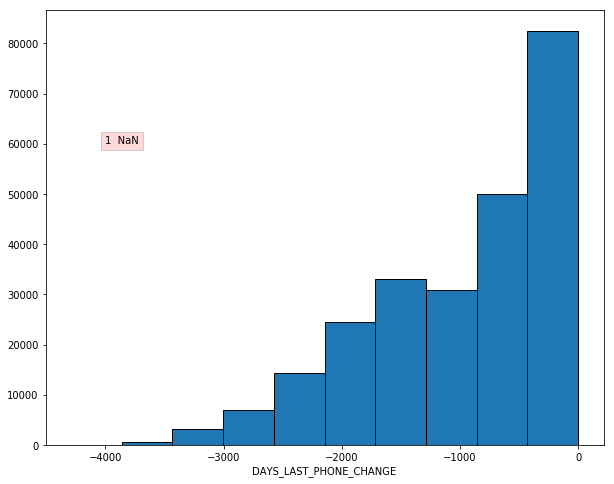

In [71]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DAYS_LAST_PHONE_CHANGE'].dropna(), edgecolor='k')
plt.text(-4000, 60000, '%d %s' %(dftrain['DAYS_LAST_PHONE_CHANGE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.show()

In [72]:
dftrain['YRS_PHONE_CHANGE'] = abs(dftrain['DAYS_LAST_PHONE_CHANGE']/365.)

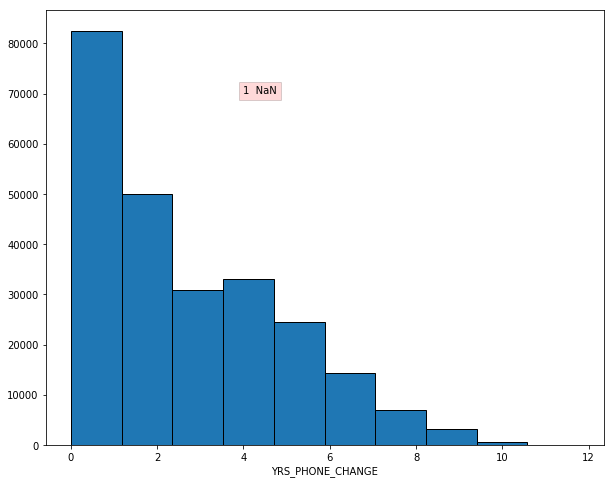

In [73]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['YRS_PHONE_CHANGE'].dropna(), edgecolor='k')
plt.text(4, 70000, '%d %s' %(dftrain['YRS_PHONE_CHANGE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('YRS_PHONE_CHANGE')
plt.show()

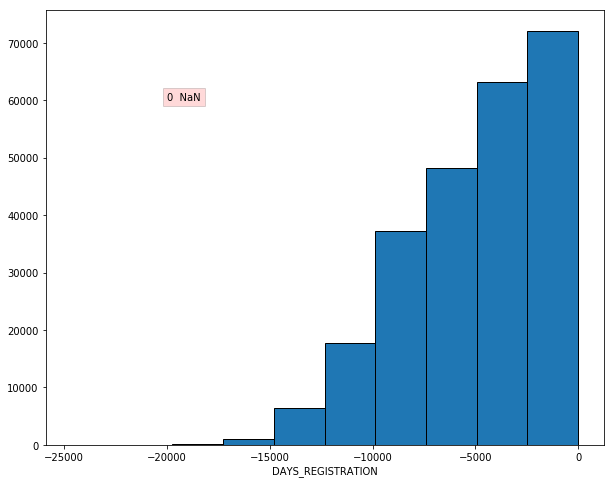

In [74]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DAYS_REGISTRATION'].dropna(), edgecolor='k')
plt.text(-20000, 60000, '%d %s' %(dftrain['DAYS_REGISTRATION'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DAYS_REGISTRATION')
plt.show()

In [75]:
dftrain['YRS_REG'] = abs(dftrain['DAYS_REGISTRATION']/365.)

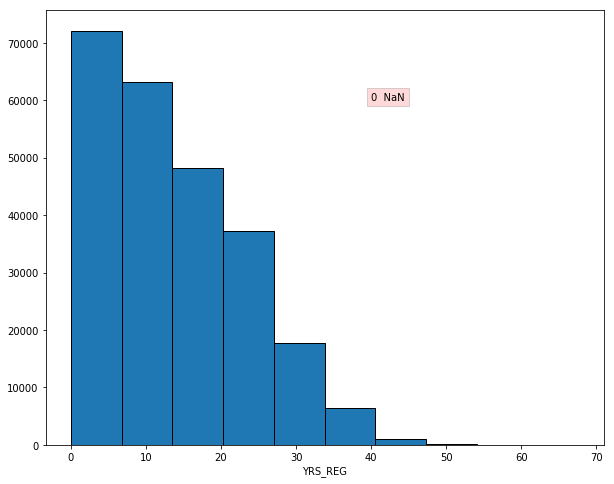

In [76]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['YRS_REG'].dropna(), edgecolor='k')
plt.text(40, 60000, '%d %s' %(dftrain['YRS_REG'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('YRS_REG')
plt.show()

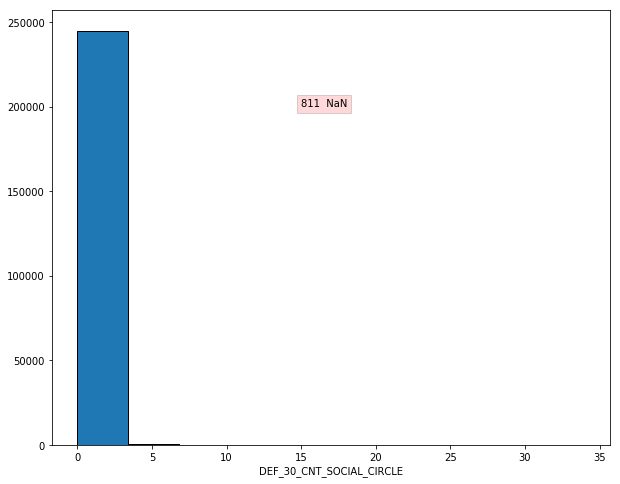

In [77]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DEF_30_CNT_SOCIAL_CIRCLE'].dropna(), edgecolor='k')
plt.text(15, 200000, '%d %s' %(dftrain['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

In [78]:
dftrain.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    245198.000000
mean          0.143419
std           0.447838
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

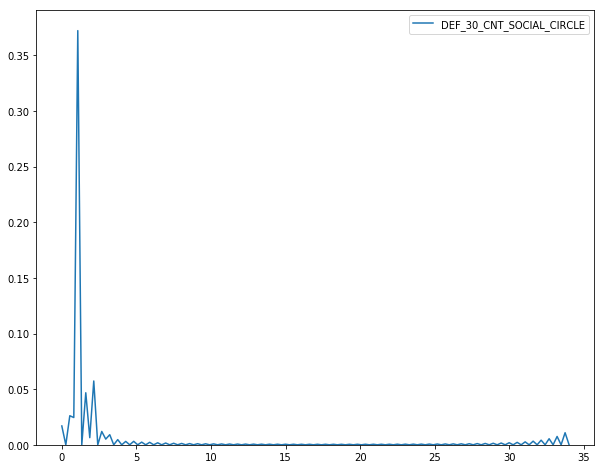

In [79]:
fig = plt.figure(figsize=(10,8))
sns.kdeplot(dftrain.DEF_30_CNT_SOCIAL_CIRCLE.dropna());

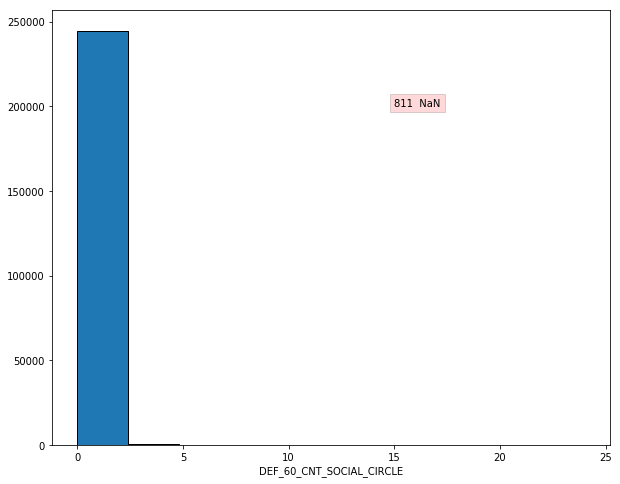

In [80]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['DEF_60_CNT_SOCIAL_CIRCLE'].dropna(), edgecolor='k')
plt.text(15, 200000, '%d %s' %(dftrain['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')
plt.show()

In [81]:
dftrain.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    245198.000000
mean          0.099968
std           0.363248
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

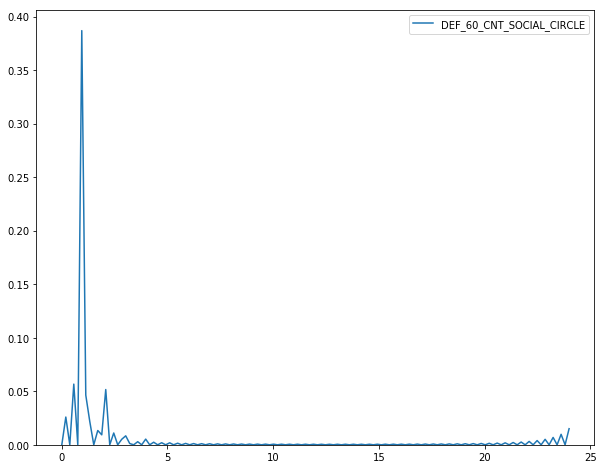

In [82]:
fig = plt.figure(figsize=(10,8))
sns.kdeplot(dftrain.DEF_60_CNT_SOCIAL_CIRCLE.dropna());

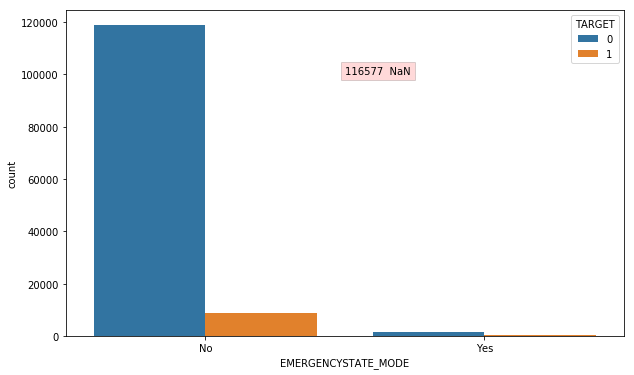

In [83]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['EMERGENCYSTATE_MODE'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 100000, '%d %s' %(dftrain['EMERGENCYSTATE_MODE'].isnull().sum(), ' NaN'),
         bbox={'facecolor':'red', 'alpha':0.15});

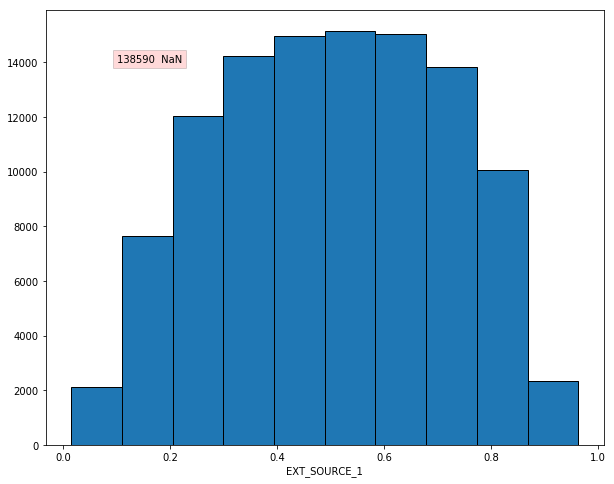

In [84]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['EXT_SOURCE_1'].dropna(), edgecolor='k')
plt.text(0.1, 14000, '%d %s' %(dftrain['EXT_SOURCE_1'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('EXT_SOURCE_1')
plt.show()

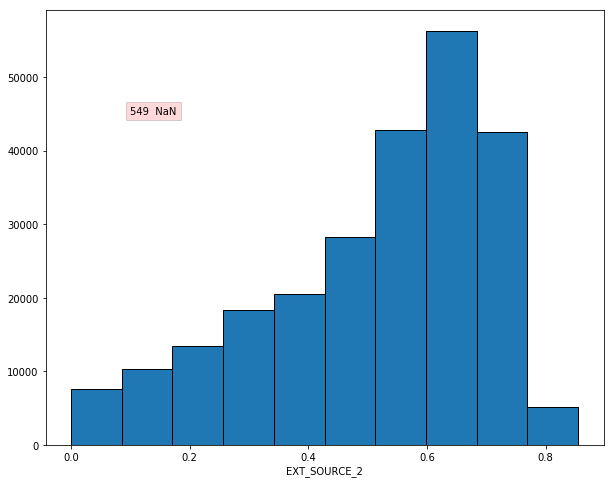

In [85]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['EXT_SOURCE_2'].dropna(), edgecolor='k')
plt.text(0.1, 45000, '%d %s' %(dftrain['EXT_SOURCE_2'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('EXT_SOURCE_2')
plt.show()

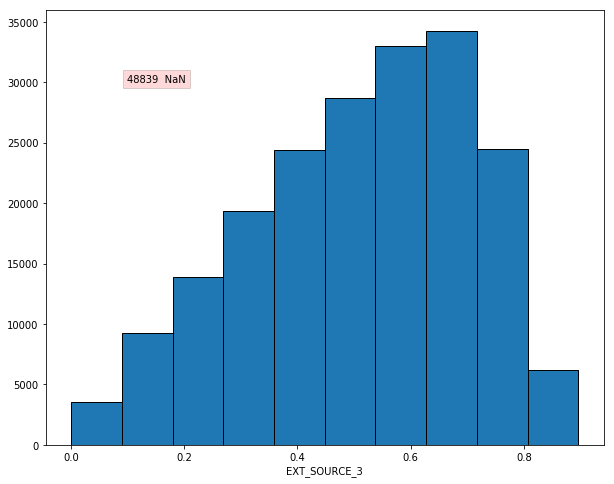

In [86]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['EXT_SOURCE_3'].dropna(), edgecolor='k')
plt.text(0.1, 30000, '%d %s' %(dftrain['EXT_SOURCE_3'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('EXT_SOURCE_3')
plt.show()

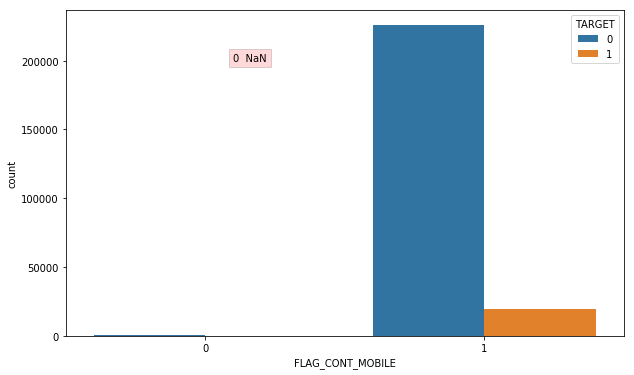

In [87]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_CONT_MOBILE'].dropna(), hue=dftrain['TARGET'])
plt.text(0.1, 200000, '%d %s' %(dftrain['FLAG_CONT_MOBILE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

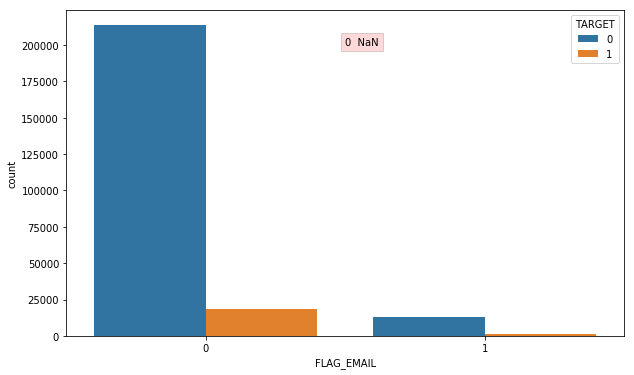

In [88]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_EMAIL'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 200000, '%d %s' %(dftrain['FLAG_EMAIL'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

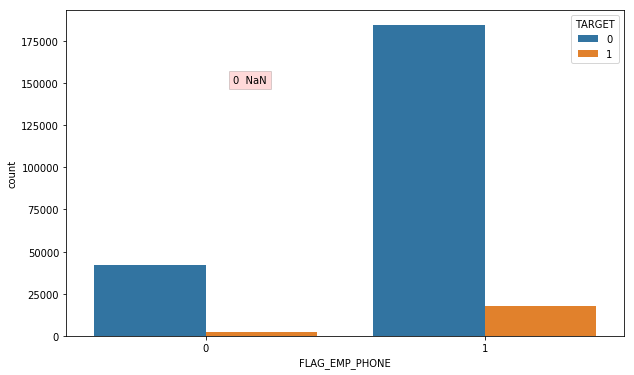

In [89]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_EMP_PHONE'].dropna(), hue=dftrain['TARGET'])
plt.text(0.1, 150000, '%d %s' %(dftrain['FLAG_EMP_PHONE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

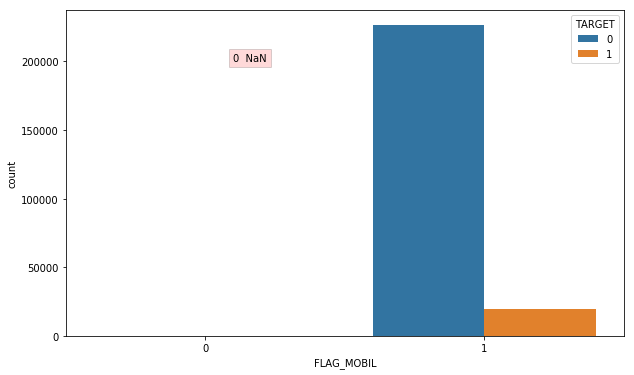

In [90]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_MOBIL'].dropna(), hue=dftrain['TARGET'])
plt.text(0.1, 200000, '%d %s' %(dftrain['FLAG_MOBIL'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

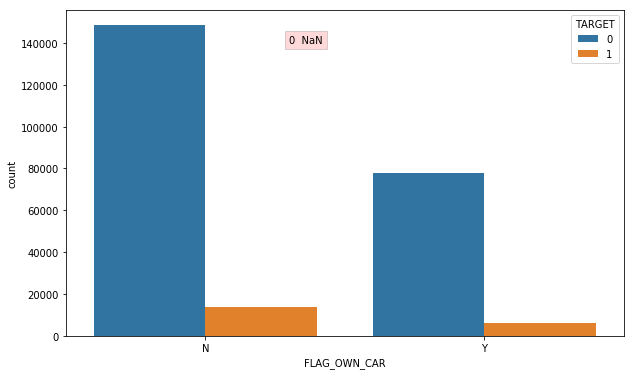

In [91]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_OWN_CAR'].dropna(), hue=dftrain['TARGET'])
plt.text(0.3, 140000, '%d %s' %(dftrain['FLAG_OWN_CAR'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

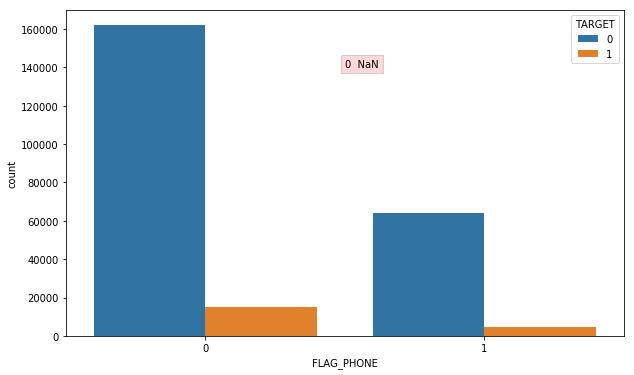

In [92]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_PHONE'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 140000, '%d %s' %(dftrain['FLAG_PHONE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

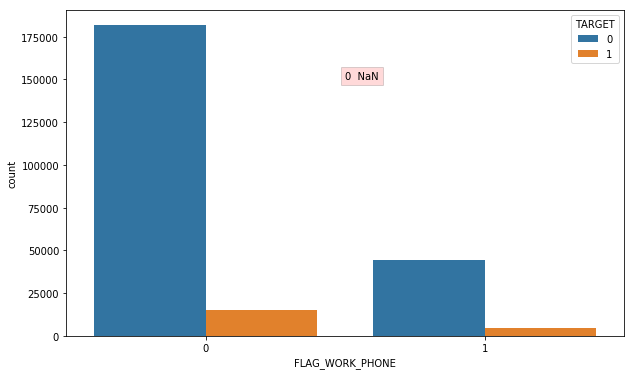

In [93]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FLAG_WORK_PHONE'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 150000, '%d %s' %(dftrain['FLAG_WORK_PHONE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

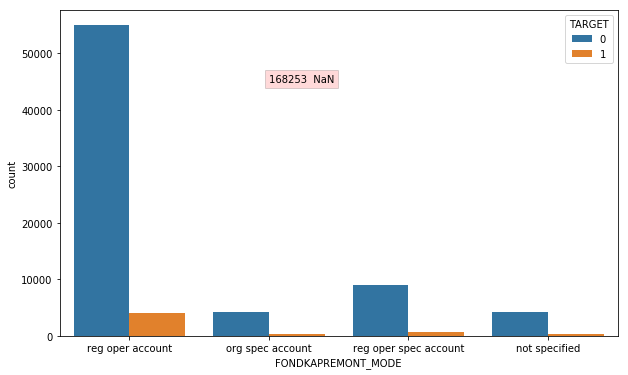

In [94]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['FONDKAPREMONT_MODE'].dropna(), hue=dftrain['TARGET'])
plt.text(1, 45000, '%d %s' %(dftrain['FONDKAPREMONT_MODE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

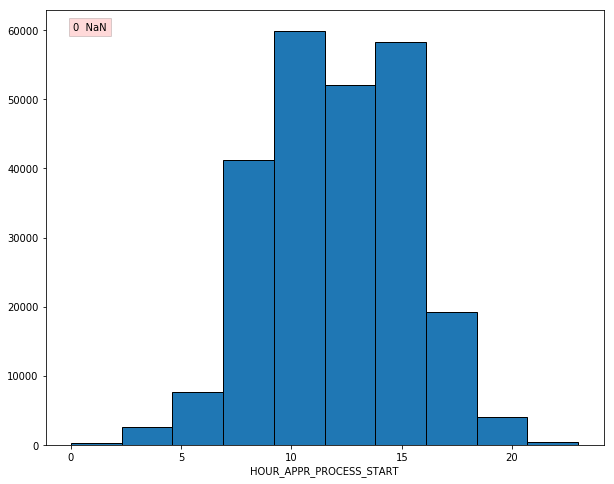

In [95]:
fig = plt.figure(figsize=(10,8))
plt.hist(dftrain['HOUR_APPR_PROCESS_START'].dropna(), edgecolor='k')
plt.text(0.1, 60000, '%d %s' %(dftrain['HOUR_APPR_PROCESS_START'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.show()

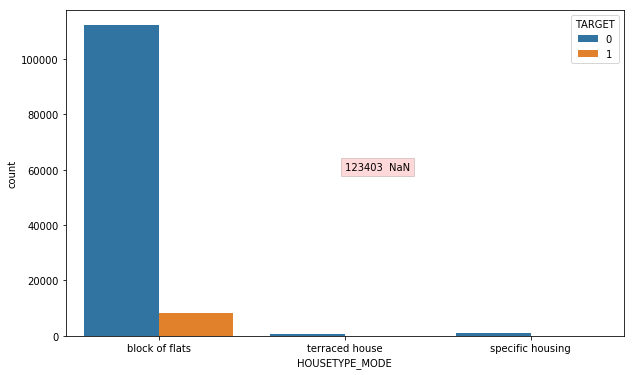

In [96]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['HOUSETYPE_MODE'].dropna(), hue=dftrain['TARGET'])
plt.text(1, 60000, '%d %s' %(dftrain['HOUSETYPE_MODE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

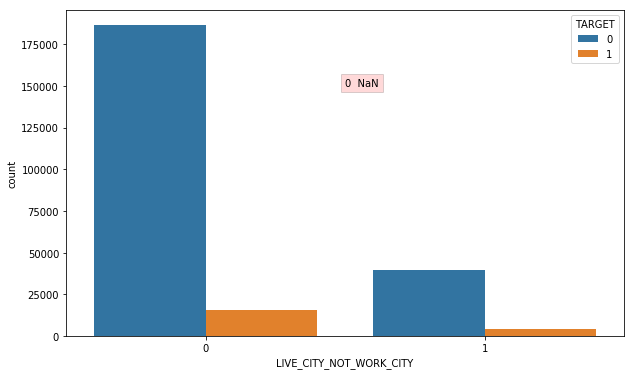

In [97]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['LIVE_CITY_NOT_WORK_CITY'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 150000, '%d %s' %(dftrain['LIVE_CITY_NOT_WORK_CITY'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

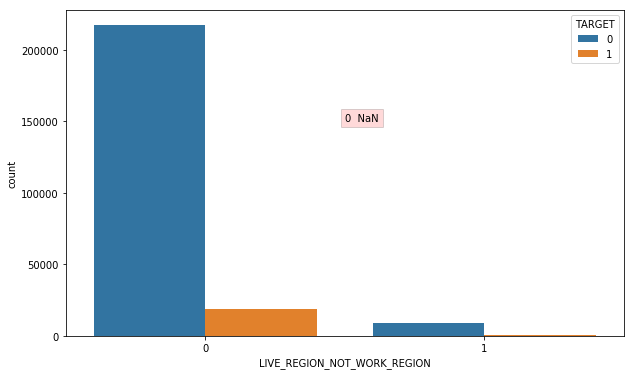

In [98]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['LIVE_REGION_NOT_WORK_REGION'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 150000, '%d %s' %(dftrain['LIVE_REGION_NOT_WORK_REGION'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

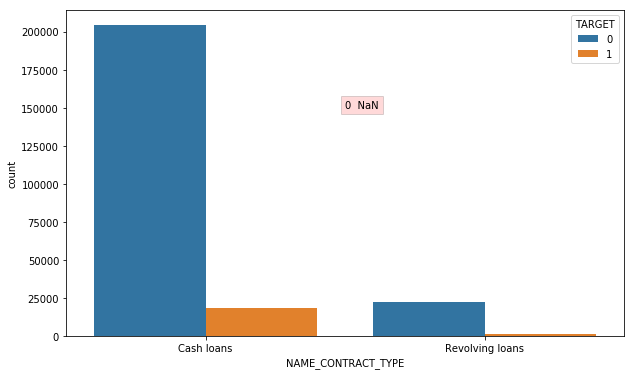

In [99]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['NAME_CONTRACT_TYPE'].dropna(), hue=dftrain['TARGET'])
plt.text(0.5, 150000, '%d %s' %(dftrain['NAME_CONTRACT_TYPE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});

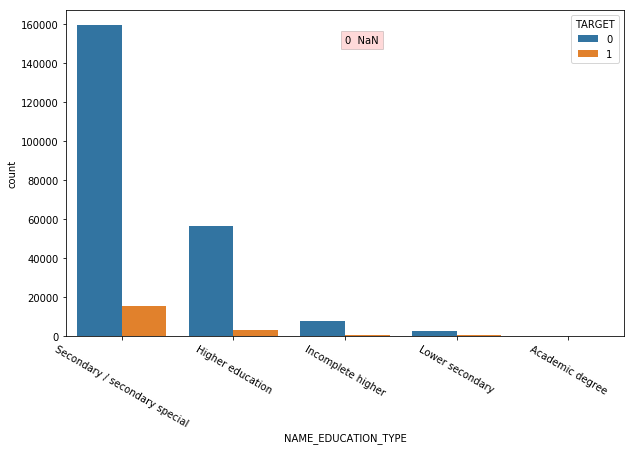

In [100]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['NAME_EDUCATION_TYPE'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 150000, '%d %s' %(dftrain['NAME_EDUCATION_TYPE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xticks(rotation=-30);

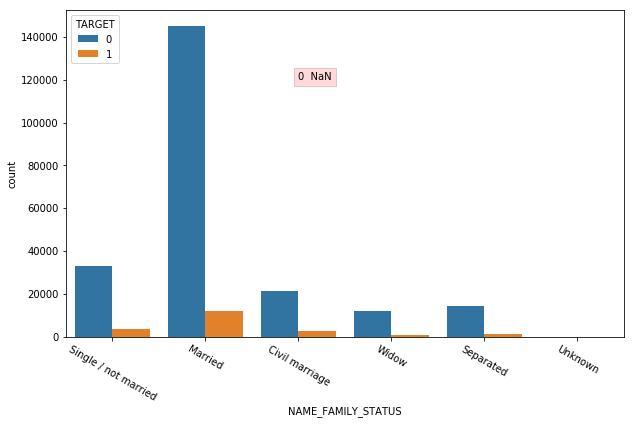

In [101]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['NAME_FAMILY_STATUS'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 120000, '%d %s' %(dftrain['NAME_FAMILY_STATUS'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xticks(rotation=-30);

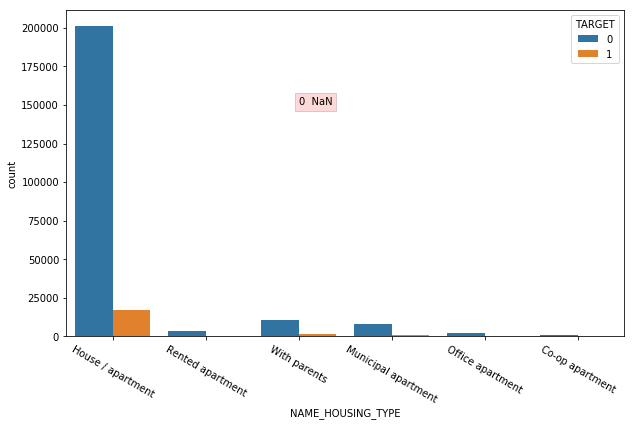

In [102]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['NAME_HOUSING_TYPE'].dropna(), hue=dftrain['TARGET'])
plt.text(2, 150000, '%d %s' %(dftrain['NAME_HOUSING_TYPE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xticks(rotation=-30);

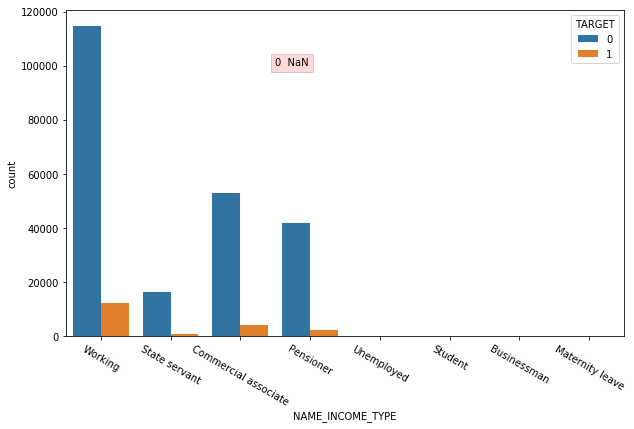

In [103]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['NAME_INCOME_TYPE'].dropna(), hue=dftrain['TARGET'])
plt.text(2.5, 100000, '%d %s' %(dftrain['NAME_INCOME_TYPE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xticks(rotation=-30);

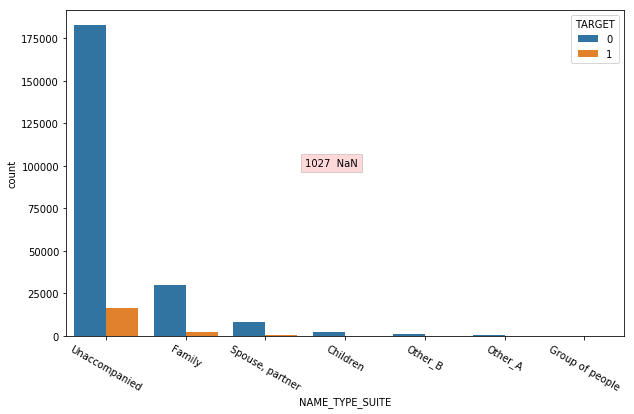

In [104]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['NAME_TYPE_SUITE'].dropna(), hue=dftrain['TARGET'])
plt.text(2.5, 100000, '%d %s' %(dftrain['NAME_TYPE_SUITE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xticks(rotation=-30);

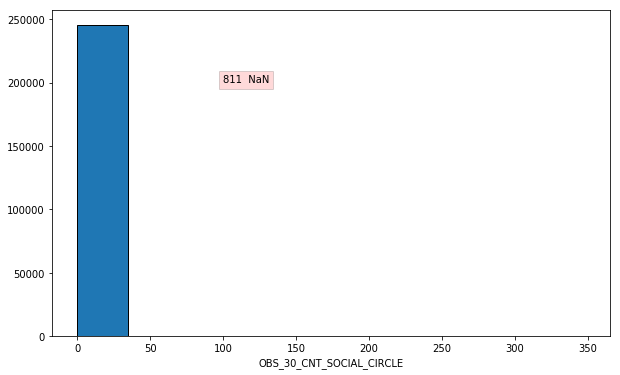

In [105]:
fig = plt.figure(figsize=(10,6))
plt.hist(dftrain['OBS_30_CNT_SOCIAL_CIRCLE'].dropna(), edgecolor='k')
plt.text(100, 200000, '%d %s' %(dftrain['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')
plt.show()

In [106]:
dftrain.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    245198.000000
mean          1.424559
std           2.426841
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

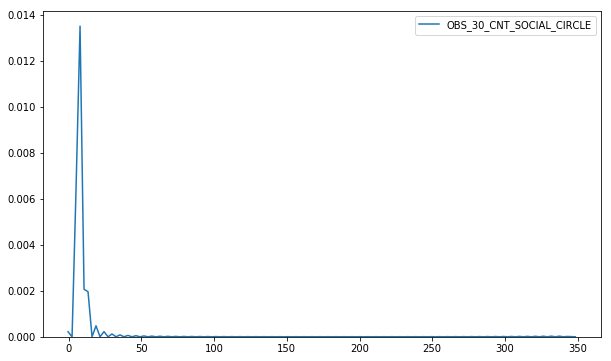

In [107]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(dftrain.OBS_30_CNT_SOCIAL_CIRCLE.dropna());

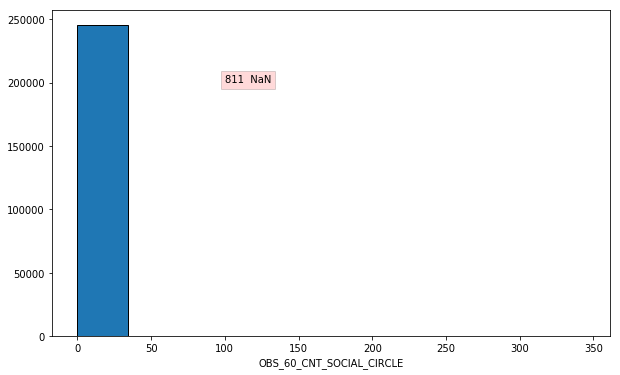

In [108]:
fig = plt.figure(figsize=(10,6))
plt.hist(dftrain['OBS_60_CNT_SOCIAL_CIRCLE'].dropna(), edgecolor='k')
plt.text(100, 200000, '%d %s' %(dftrain['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()

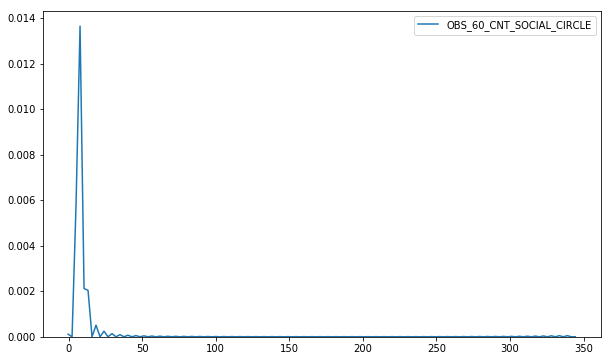

In [109]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(dftrain.OBS_60_CNT_SOCIAL_CIRCLE.dropna());

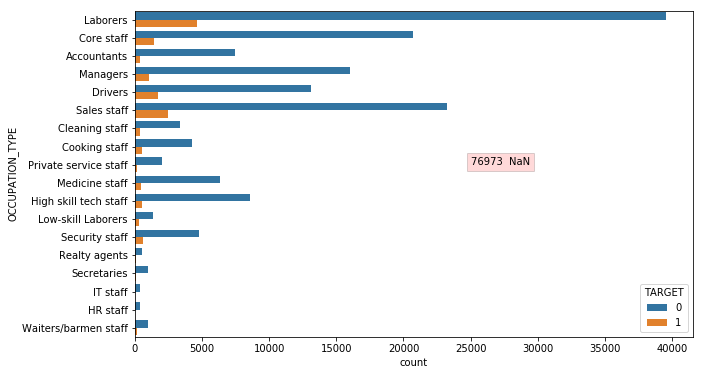

In [110]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y=dftrain['OCCUPATION_TYPE'].dropna(), hue=dftrain['TARGET'])
plt.text(25000, 8, '%d %s' %(dftrain['OCCUPATION_TYPE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15});
#plt.xticks(rotation=-30);

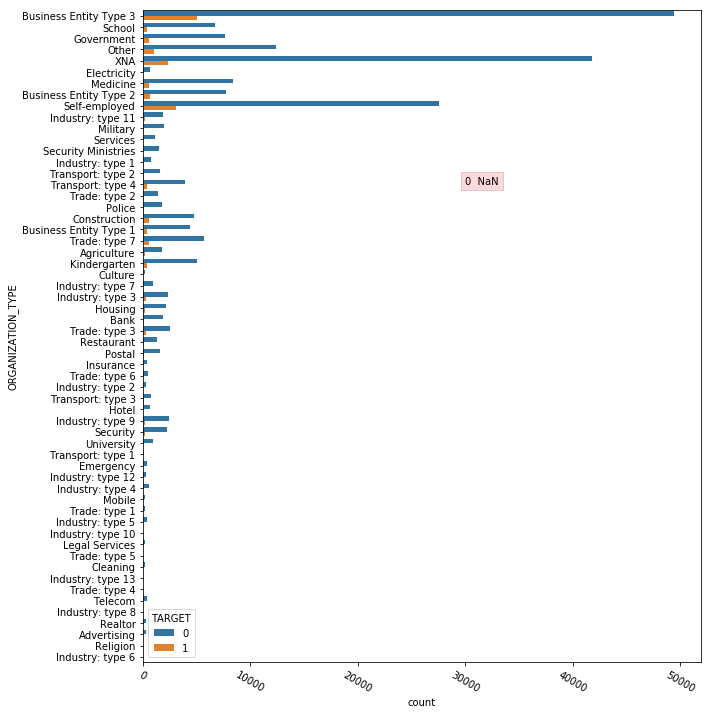

In [111]:
fig = plt.figure(figsize=(10,12))
sns.countplot(y=dftrain['ORGANIZATION_TYPE'].dropna(), hue=dftrain['TARGET'])
plt.text(30000, 15, '%d %s' %(dftrain['ORGANIZATION_TYPE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xticks(rotation=-30);

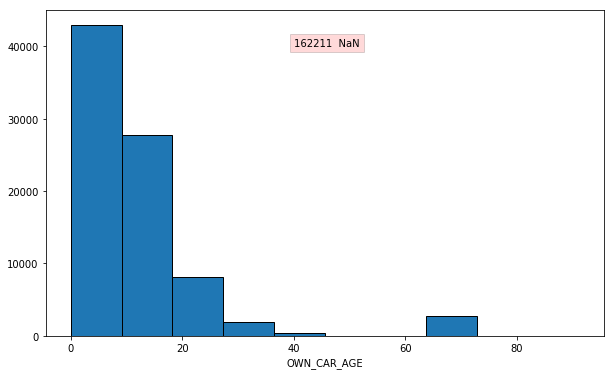

In [112]:
fig = plt.figure(figsize=(10,6))
plt.hist(dftrain['OWN_CAR_AGE'].dropna(), edgecolor='k')
plt.text(40, 40000, '%d %s' %(dftrain['OWN_CAR_AGE'].isnull().sum(), ' NaN'), bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('OWN_CAR_AGE')
plt.show()

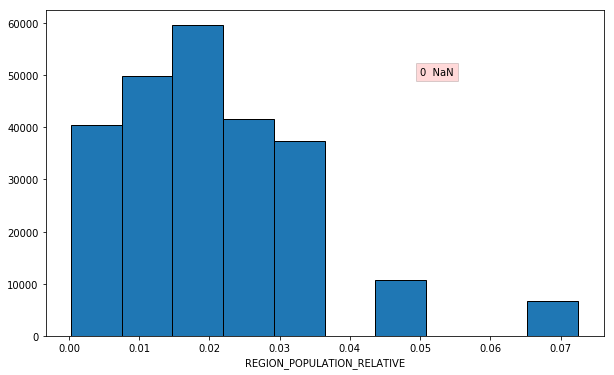

In [113]:
fig = plt.figure(figsize=(10,6))
plt.hist(dftrain['REGION_POPULATION_RELATIVE'].dropna(), edgecolor='k')
plt.text(0.05, 50000, '%d %s' %(dftrain['REGION_POPULATION_RELATIVE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.show()

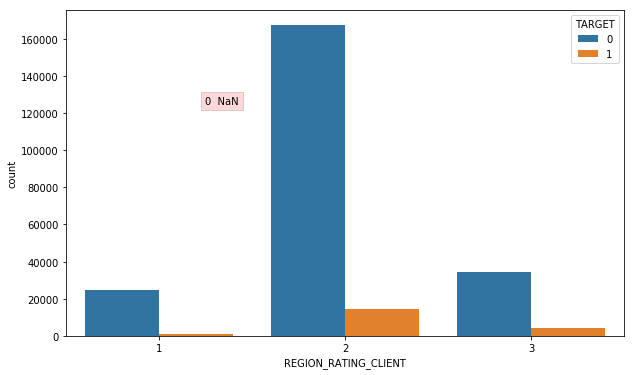

In [114]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['REGION_RATING_CLIENT'].dropna(), hue=dftrain['TARGET'])
plt.text(0.25, 125000, '%d %s' %(dftrain['REGION_RATING_CLIENT'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});
#plt.xticks(rotation=-30);

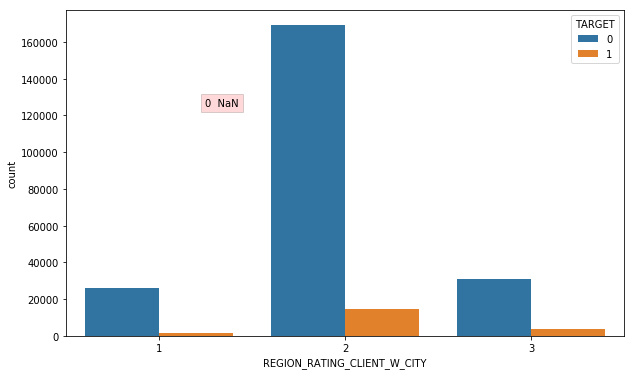

In [115]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['REGION_RATING_CLIENT_W_CITY'].dropna(), hue=dftrain['TARGET'])
plt.text(0.25, 125000, '%d %s' %(dftrain['REGION_RATING_CLIENT_W_CITY'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

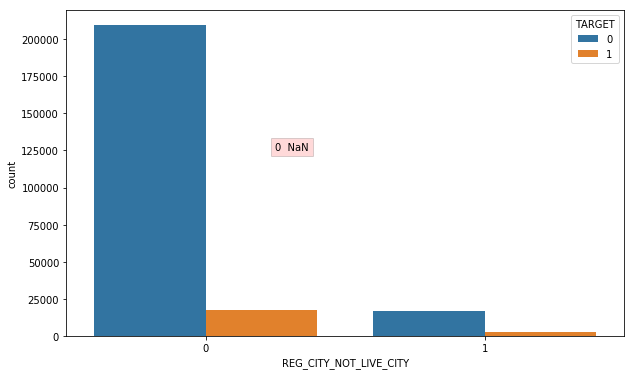

In [116]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['REG_CITY_NOT_LIVE_CITY'].dropna(), hue=dftrain['TARGET'])
plt.text(0.25, 125000, '%d %s' %(dftrain['REG_CITY_NOT_LIVE_CITY'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

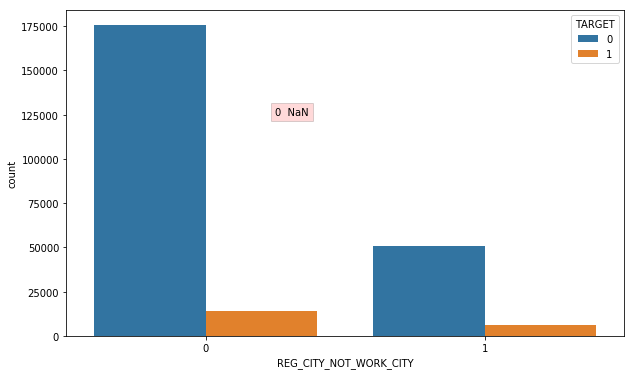

In [117]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['REG_CITY_NOT_WORK_CITY'].dropna(), hue=dftrain['TARGET'])
plt.text(0.25, 125000, '%d %s' %(dftrain['REG_CITY_NOT_WORK_CITY'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

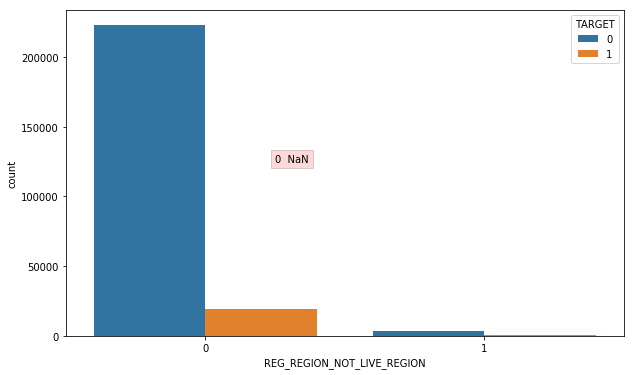

In [118]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['REG_REGION_NOT_LIVE_REGION'].dropna(), hue=dftrain['TARGET'])
plt.text(0.25, 125000, '%d %s' %(dftrain['REG_REGION_NOT_LIVE_REGION'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

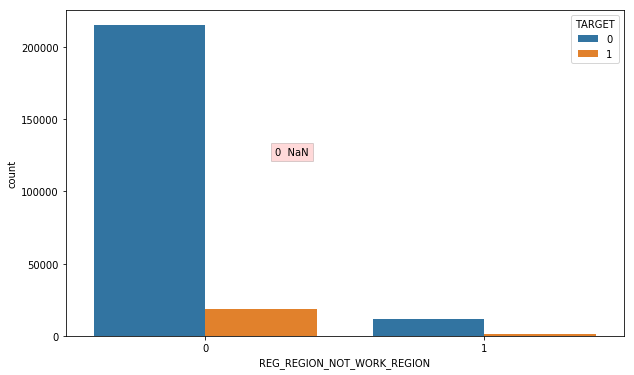

In [119]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['REG_REGION_NOT_WORK_REGION'].dropna(), hue=dftrain['TARGET'])
plt.text(0.25, 125000, '%d %s' %(dftrain['REG_REGION_NOT_WORK_REGION'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

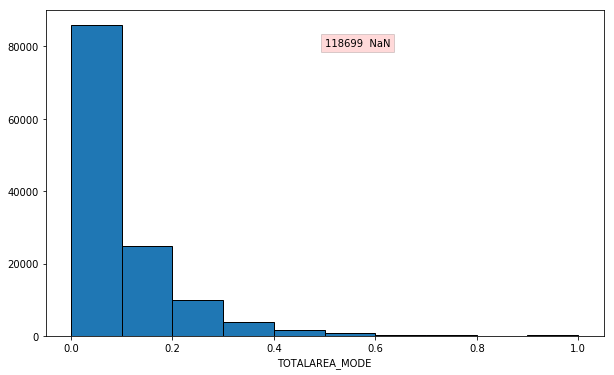

In [120]:
fig = plt.figure(figsize=(10,6))
plt.hist(dftrain['TOTALAREA_MODE'].dropna(), edgecolor='k')
plt.text(0.5, 80000, '%d %s' %(dftrain['TOTALAREA_MODE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15})
plt.xlabel('TOTALAREA_MODE')
plt.show()

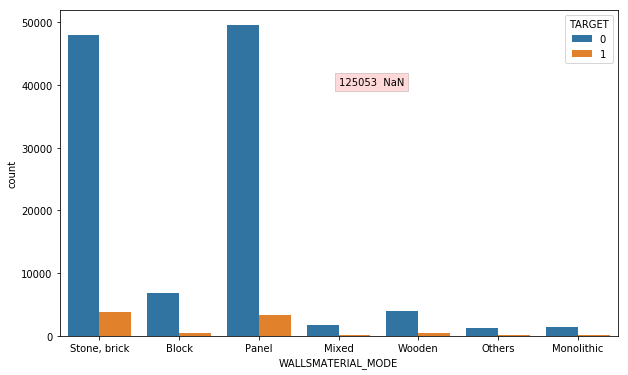

In [121]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['WALLSMATERIAL_MODE'].dropna(), hue=dftrain['TARGET'])
plt.text(3, 40000, '%d %s' %(dftrain['WALLSMATERIAL_MODE'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

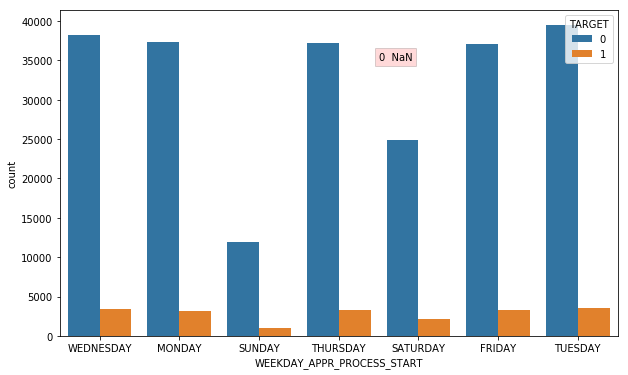

In [122]:
fig = plt.figure(figsize=(10,6))
sns.countplot(dftrain['WEEKDAY_APPR_PROCESS_START'].dropna(), hue=dftrain['TARGET'])
plt.text(3.5, 35000, '%d %s' %(dftrain['WEEKDAY_APPR_PROCESS_START'].isnull().sum(), ' NaN'), 
         bbox={'facecolor':'red', 'alpha':0.15});

In [125]:
dftrain.to_csv('app_train_80_mod.csv')